<h2> Task 3. Implement Simulated Annealing </h2> with following options for "cooling" the temperature:

*   Linear Cooling Schedule: Tk = T0 − α⋅k, where T0 is initial temperature, α is a constant and k is iteration number.
*   Logarithmic Cooling Schedule: Tk = (T0)/(log(k+1)), where T0 is initial temperature and k is iteration number
*   Exponential Cooling Schedule: Tk = T0 ⋅ B^k, where T0 is initial temperature, k is iteration number and 0 < β < 1 is cooling rate
*   Adaptive Cooling Schedule: An adaptive temperature schedule adjusts the cooling rate based on the algorithm's performance, such as the acceptance rate of new solutions. The idea is to slow down the cooling process if the algorithm is still finding better solutions and to speed it up if the algorithm is stagnating
*   Custom cooling schedule: A custom temperature schedule can be designed to fit specific problem characteristics or based on empirical observations. Get creative in this one. It does not have to work better, but have an explanation of your idea.


Simulated Annealing Results:
LINEAR       | value=0.393262
LOGARITHMIC  | value=0.753758
EXPONENTIAL  | value=0.007637
ADAPTIVE     | value=0.041662
CUSTOM       | value=0.041315


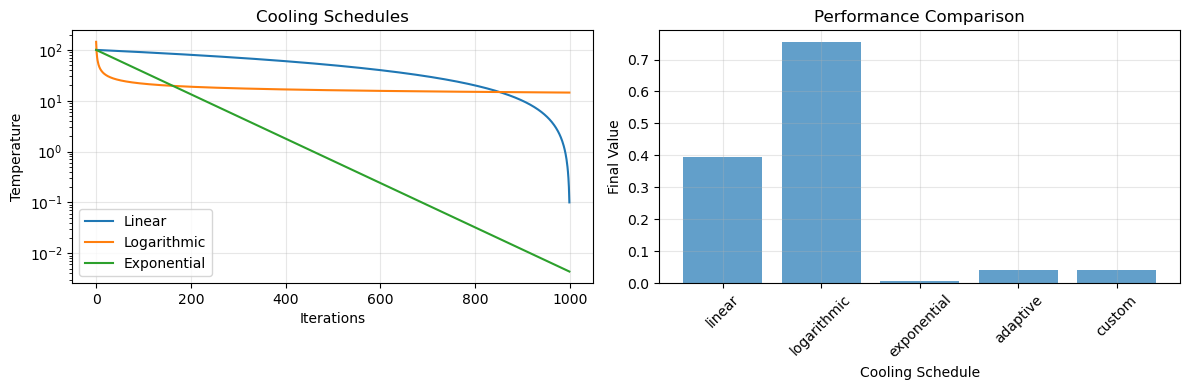

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective2(x):
    sum_part = sum(x_i**2 for x_i in x) / 4000
    product_part = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))
    return 1 + sum_part - product_part

def simulated_annealing(objective_func, bounds, dimensions, max_iterations=1000,
                        initial_temp=100, cooling_schedule='exponential', 
                        alpha=0.1, beta=0.99):
    current = np.random.uniform(bounds[0], bounds[1], dimensions)
    current_value = objective_func(current)
    best = current.copy()
    best_value = current_value
    
    acceptance_count = 0
    
    for k in range(max_iterations):
        neighbor = current + np.random.normal(0, 0.1, dimensions)
        neighbor = np.clip(neighbor, bounds[0], bounds[1])
        neighbor_value = objective_func(neighbor)
        
        if cooling_schedule == 'linear':
            temperature = max(0.01, initial_temp - alpha * k) 
        elif cooling_schedule == 'logarithmic':
            temperature = initial_temp / np.log(k + 2)
        elif cooling_schedule == 'exponential':
            temperature = initial_temp * (beta ** k)
        elif cooling_schedule == 'adaptive':
            if k > 0 and k % 50 == 0:
                acceptance_rate = acceptance_count / 50
                if acceptance_rate > 0.3:
                    beta = 0.995 # still exploring, slow down cooling
                elif acceptance_rate < 0.1:
                    beta = 0.95 # too greedy, speed up cooling
                else:
                    beta = 0.99 # balanced exploration and exploitation
                acceptance_count = 0
            temperature = initial_temp * (beta ** k)
        elif cooling_schedule == 'custom':
            wave = 0.3 * np.sin(2 * np.pi * k / 100)
            temperature = initial_temp * (beta ** k) * (1 + wave) # exponential with oscillation 
        
        if neighbor_value < current_value:
            current = neighbor
            current_value = neighbor_value
            if cooling_schedule == 'adaptive':
                acceptance_count += 1
        else:
            delta = neighbor_value - current_value
            probability = np.exp(-delta / temperature) if temperature > 0 else 0
            if np.random.random() < probability:
                current = neighbor
                current_value = neighbor_value
                if cooling_schedule == 'adaptive':
                    acceptance_count += 1
        
        if current_value < best_value:
            best = current.copy()
            best_value = current_value
    
    return best, best_value

schedules = ['linear', 'logarithmic', 'exponential', 'adaptive', 'custom']
results = {}

print("Simulated Annealing Results:")
print("=" * 60)

for schedule in schedules:
    solution, value = simulated_annealing(objective2, (-5, 5), 5,
                                          max_iterations=2000,
                                          cooling_schedule=schedule)
    results[schedule] = (solution, value)
    print(f"{schedule.upper():12} | value={value:.6f}")

print("=" * 60)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
iterations = np.arange(1000)
for schedule in ['linear', 'logarithmic', 'exponential']:
    temps = []
    for k in iterations:
        if schedule == 'linear':
            temp = max(0.01, 100 - 0.1 * k)
        elif schedule == 'logarithmic':
            temp = 100 / np.log(k + 2)
        elif schedule == 'exponential':
            temp = 100 * (0.99 ** k)
        temps.append(temp)
    plt.plot(iterations, temps, label=schedule.title())

plt.xlabel('Iterations')
plt.ylabel('Temperature')
plt.title('Cooling Schedules')
plt.legend()
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
schedule_names = list(results.keys())
values = [results[s][1] for s in schedule_names]
plt.bar(schedule_names, values, alpha=0.7)
plt.xlabel('Cooling Schedule')
plt.ylabel('Final Value')
plt.title('Performance Comparison')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<h2> Task 4. Evaluate implemented temperature schedulers </h2>  in terms of:

*   Exploration vs. Exploitation: if the cooling schedule is too aggressive, the algorithm may converge prematurely, settling in local minima instead of finding the global minimum
*   Convergence Speed: well-tuned cooling schedule can significantly reduce the number of iterations required to converge to a good solution.
*   Quality of Solutions: A gradual cooling schedule tends to yield better quality solutions since it allows the algorithm to explore the solution space longer before committing to a particular region.

Define Metrics for Evaluation:
*   Exploration vs. Exploitation: Measure the acceptance rate of worse solutions over iterations
*   Convergence Speed: Track the number of iterations taken to reach a solution within a predefined tolerance
*   Quality of Solutions: Compare the final solution obtained by different temperature schedulers to the known optimal or global minimum value
*   Report hyperparameters which will make SA never converge. Why?

<p> Use Rastrigin function  as objective function for evaluation. Google how it looks, it is a function with a lot of local minima and only one global minima. You will have to run each setup multiple times. Create a table with results, visualize it using boxplots (for example). Compare mean values of metrics and based on that draw conclusions. </p>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Rastrigin_function.png" alt="Example Image" width="300" height="200">


Running temperature scheduler evaluation...
Testing each schedule with 30 trials...
Evaluating linear...
Evaluating logarithmic...
Evaluating exponential...
Evaluating adaptive...
Evaluating custom...

TEMPERATURE SCHEDULER EVALUATION RESULTS
Schedule     | Mean Quality | Convergence Speed | Exploration Rate
-----------------------------------------------------------------
linear       |       7.107 |           983.9 |        0.453
logarithmic  |       6.360 |           954.5 |        0.435
exponential  |      11.448 |           975.8 |        0.185
adaptive     |       7.039 |           989.4 |        0.337
custom       |      11.754 |          1000.0 |        0.186


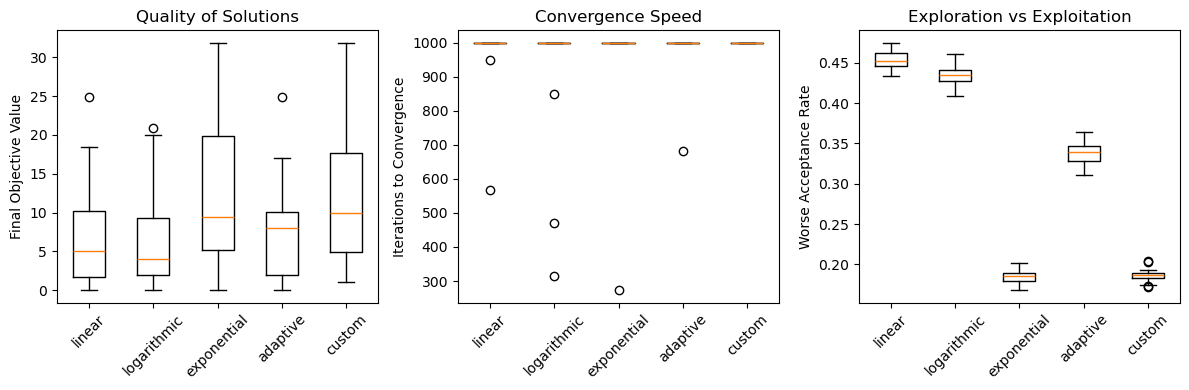


NON-CONVERGENCE ANALYSIS
Testing problematic configurations:
Configuration                     | Final Value | Reason
----------------------------------------------------------------------
linear (bad params)               |      25.87 | Too fast cooling
exponential (bad params)          |      25.90 | Aggressive cooling
custom (bad params)               |      25.90 | No initial exploration

CONCLUSIONS
Best solution quality: logarithmic
Fastest convergence: logarithmic

Key Findings:
• logarithmic cooling achieved best solution quality
• logarithmic cooling converged fastest


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def rastrigin(x):
    A = 10
    n = len(x)
    return A * n + sum(x_i ** 2 - A * np.cos(2 * np.pi * x_i) for x_i in x)

def simulated_annealing_metrics(objective_func, bounds, dimensions, max_iterations=1000,
                                initial_temp=100, cooling_schedule='exponential',
                                alpha=0.1, beta=0.99, step_size=0.1):

    current = np.random.uniform(bounds[0], bounds[1], dimensions)
    current_value = objective_func(current)
    best = current.copy()
    best_value = current_value

    worse_accepted = 0
    convergence_iter = max_iterations
    check_interval = 50
    acceptance_count = 0

    for k in range(max_iterations):
        neighbor = current + np.random.normal(0, step_size, dimensions)
        neighbor = np.clip(neighbor, bounds[0], bounds[1])
        neighbor_value = objective_func(neighbor)

        if cooling_schedule == 'linear':
            temperature = max(0.01, initial_temp - alpha * k)
        elif cooling_schedule == 'logarithmic':
            temperature = initial_temp / np.log(k + 2)
        elif cooling_schedule == 'exponential':
            temperature = initial_temp * (beta ** k)
        elif cooling_schedule == 'adaptive':
            if k > 0 and k % check_interval == 0:
                acceptance_rate = acceptance_count / check_interval
                if acceptance_rate > 0.3:
                    beta = 0.995  # Slower cooling
                elif acceptance_rate < 0.1:
                    beta = 0.95   # Faster cooling
                else:
                    beta = 0.99   # Standard cooling
                acceptance_count = 0
            temperature = initial_temp * (beta ** k)
        elif cooling_schedule == 'custom':
            wave = 0.3 * np.sin(2 * np.pi * k / 100)
            temperature = initial_temp * (beta ** k) * (1 + wave)

      
        if neighbor_value < current_value:
            current = neighbor
            current_value = neighbor_value
            if cooling_schedule == 'adaptive':
                acceptance_count += 1
        else:
            delta = neighbor_value - current_value
            probability = np.exp(-delta / temperature) if temperature > 0 else 0
            if np.random.random() < probability:
                current = neighbor
                current_value = neighbor_value
                worse_accepted += 1  
                if cooling_schedule == 'adaptive':
                    acceptance_count += 1

        if current_value < best_value:
            best = current.copy()
            best_value = current_value
            if best_value < 0.1 and convergence_iter == max_iterations:
                convergence_iter = k

    exploration_rate = worse_accepted / max_iterations
    return best, best_value, exploration_rate, convergence_iter

schedules = ['linear', 'logarithmic', 'exponential', 'adaptive', 'custom']
num_trials = 30
results = {schedule: {'quality': [], 'convergence': [], 'exploration': []} for schedule in schedules}

print("Running temperature scheduler evaluation...")
print("Testing each schedule with 30 trials...")

for schedule in schedules:
    print(f"Evaluating {schedule}...")
    for trial in range(num_trials):
        np.random.seed(trial * 100)  
        
        _, quality, exploration, convergence = simulated_annealing_metrics(
            rastrigin, (-5.12, 5.12), 2, max_iterations=1000, cooling_schedule=schedule
        )
        
        results[schedule]['quality'].append(quality)
        results[schedule]['convergence'].append(convergence)
        results[schedule]['exploration'].append(exploration)


print("\nTEMPERATURE SCHEDULER EVALUATION RESULTS")
print("=" * 65)
print("Schedule     | Mean Quality | Convergence Speed | Exploration Rate")
print("-" * 65)

for schedule in schedules:
    mean_quality = np.mean(results[schedule]['quality'])
    mean_convergence = np.mean(results[schedule]['convergence'])
    mean_exploration = np.mean(results[schedule]['exploration'])
    print(f"{schedule:12} | {mean_quality:11.3f} | {mean_convergence:15.1f} | {mean_exploration:12.3f}")


plt.figure(figsize=(12, 4))

# Plot 1: Solution Quality
plt.subplot(1, 3, 1)
quality_data = [results[s]['quality'] for s in schedules]
plt.boxplot(quality_data, tick_labels=schedules)
plt.ylabel('Final Objective Value')
plt.title('Quality of Solutions')
plt.xticks(rotation=45)

# Plot 2: Convergence Speed
plt.subplot(1, 3, 2)
convergence_data = [results[s]['convergence'] for s in schedules]
plt.boxplot(convergence_data, tick_labels=schedules)
plt.ylabel('Iterations to Convergence')
plt.title('Convergence Speed')
plt.xticks(rotation=45)

# Plot 3: Exploration vs Exploitation
plt.subplot(1, 3, 3)
exploration_data = [results[s]['exploration'] for s in schedules]
plt.boxplot(exploration_data, tick_labels=schedules)
plt.ylabel('Worse Acceptance Rate')
plt.title('Exploration vs Exploitation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\nNON-CONVERGENCE ANALYSIS")
print("=" * 50)

# Test problematic parameter combinations
problematic_configs = [
    {'schedule': 'linear', 'alpha': 50, 'reason': 'Too fast cooling'}, # exploration ends after two iterations
    {'schedule': 'exponential', 'beta': 0.1, 'reason': 'Aggressive cooling'}, # temperature drops too quickly, becomes Hill Climber
    {'schedule': 'custom', 'initial_temp': 0.01, 'reason': 'No initial exploration'}, # almost no exploration at start, not enough to escape local minima
]

print("Testing problematic configurations:")
print("Configuration                     | Final Value | Reason")
print("-" * 70)

for config in problematic_configs:
    np.random.seed(42)
    
    # Run SA with problematic parameters
    if config['schedule'] == 'linear':
        _, bad_result, _, _ = simulated_annealing_metrics(
            rastrigin, (-5.12, 5.12), 2, max_iterations=200, 
            cooling_schedule='linear', alpha=config['alpha']
        )
    elif config['schedule'] == 'exponential':
        _, bad_result, _, _ = simulated_annealing_metrics(
            rastrigin, (-5.12, 5.12), 2, max_iterations=200,
            cooling_schedule='exponential', beta=config['beta']
        )
    else:  # custom
        _, bad_result, _, _ = simulated_annealing_metrics(
            rastrigin, (-5.12, 5.12), 2, max_iterations=200,
            cooling_schedule='custom', initial_temp=config['initial_temp']
        )
    
    config_name = f"{config['schedule']} (bad params)"
    print(f"{config_name:33} | {bad_result:10.2f} | {config['reason']}")

print(f"\nCONCLUSIONS")
print("=" * 50)

# Find best performers
best_quality_schedule = min(schedules, key=lambda s: np.mean(results[s]['quality']))
fastest_schedule = min(schedules, key=lambda s: np.mean(results[s]['convergence']))

print(f"Best solution quality: {best_quality_schedule}")
print(f"Fastest convergence: {fastest_schedule}")

print(f"\nKey Findings:")
print(f"• {best_quality_schedule} cooling achieved best solution quality")
print(f"• {fastest_schedule} cooling converged fastest")


#### Results Summary

##### Key Findings

- Logarithmic cooling achieved best performance (quality: 6.360, convergence: 954.5 iterations)
- Sustained exploration rate (43.5%) crucial for multimodal Rastrigin function
- Exponential cooling with β=0.99 too aggressive for 1000 iterations (drops to T=0.004)
- Linear and adaptive cooling showed moderate performance with balanced exploration
- Custom sinusoidal modulation provided no benefit over standard exponential

##### Parameters that Prevent Convergence

- Cooling too fast (α=50 in linear reaches T_min after 2 iterations)
- Aggressive exponential decay (β=0.1 becomes Hill-Climber by iteration 4)
- Starting temperature too low (T₀=0.01 eliminates initial exploration)
- Exponential β=0.99 inappropriate for extended iteration budgets (>500 iterations)